### Imports

In [1]:
import galsim
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from SpecklePSF import SpeckleSeries
import pickle
import pandas as pd

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_b_004.fits', # frames with no signal 
                                               'img_a_388.fits', 'img_b_388.fits', # frames with no signal 
                                               'img_a_389.fits', 'img_b_389.fits', # frames with no signal 
                                               'img_a_381.fits', 'img_b_381.fits', # frames with no signal 
                                               'img_a_207.fits', 'img_b_207.fits', # frames with no signal 
                                               # b frame: PSF moves suddenly by 60 pixels after 200 frames 
                                               'img_a_218.fits', 'img_b_218.fits', 
                                               'img_a_234.fits', 'img_b_234.fits']] # frames with smudges

In [2]:
# plot settings
fntsize = 12
bcol = 'royalblue'
rcol = 'indianred'

### Run minimal accumulation and fits on all speckles

In [3]:
# for file in fileNames:
#     fileNumber = file.split('.')[0].split('_')[-1]
#     test = SpeckleSeries(fileNumber, 'data', scratchdir)
#     test.fitExposures(fitMethod='hsm', 
#                       maxIters=10000, 
#                       max_amoment=5.0e6, 
#                       max_ashift=120, 
#                       savePath=saveDir)

#### load com and fwhm 

In [4]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)

In [5]:
with open('./../Fits/centroidsA.p', 'rb') as file:
    centroidDictA = pickle.load(file)
with open('./../Fits/centroidsB.p', 'rb') as file:
    centroidDictB = pickle.load(file)

#### load all the fits and combine to an object each for g1, a g2, and a HLR

In [6]:
critA, critB, g1_a, g2_b, g1_b, g2_a = {}, {}, {}, {}, {}, {}
hlr_a, hlr_b, x_a, x_b, y_a, y_b = {}, {}, {}, {}, {}, {}

for file in fileNames:
    fileNumber = file.split('.')[0].split('_')[-1]
    with open(saveDir + 'hsm_img_a_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmA = pickle.load(file)
    with open(saveDir + 'hsm_img_b_' + fileNumber + '_cumulative.p', 'rb') as file:
        hsmB = pickle.load(file)

    critA[fileNumber] = comDictA['img_a_' + fileNumber + '.fits'] + \
                        fwhmDictA['img_a_' + fileNumber + '.fits']
    critB[fileNumber] = comDictB['img_b_' + fileNumber + '.fits'] + \
                        fwhmDictB['img_b_' + fileNumber + '.fits']
    
    g1_a[fileNumber] = hsmA['g1']
    g1_b[fileNumber] = hsmB['g1']
    
    g2_a[fileNumber] = hsmA['g2']
    g2_b[fileNumber] = hsmB['g2']
    
    hlr_a[fileNumber] = hsmA['hlr']
    hlr_b[fileNumber] = hsmB['hlr']
    
    x_a[fileNumber] = hsmA['x']
    x_b[fileNumber] = hsmB['x']
    
    y_a[fileNumber] = hsmA['y']
    y_b[fileNumber] = hsmB['y']

In [7]:
allFits = pd.DataFrame(data={'critA': critA, 'critB': critB, 
                             'g1_a': g1_a, 'g1_b': g1_b, 
                             'g2_a': g2_a, 'g2_b': g2_b, 
                             'hlr_a': hlr_a,'hlr_b': hlr_b,
                             'x_a': x_a, 'x_b': x_b,
                             'y_a': y_a, 'y_b': y_b,
                            })

## Only use accepted data:

### g1 v g2

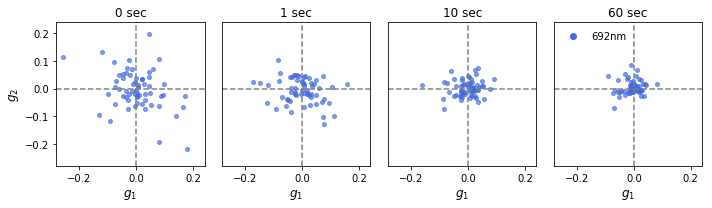

In [8]:
plt.figure(figsize=(10,3))
j = 0
times = [0, 1, 10, 60]
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(1, 4, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'w' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else bcol
        if c == bcol:
            plt.plot(allFits['g1_a'].loc[fileNumber][i], allFits['g2_a'].loc[fileNumber][i], 'o', ms=4, alpha=0.65, color=c)

    if j in [1]:
        plt.ylabel('$g_2$', fontsize=fntsize)
    else:
        plt.yticks([])
    if j in [1,2, 3, 4]:
        plt.xlabel('$g_1$', fontsize=fntsize)
    else:
        plt.xticks([])
    plt.ylim([-.28,.24])
    plt.xlim([-.28,.24])
    plt.axhline(0, linestyle='--', color='gray')
    plt.axvline(0, linestyle='--', color='gray')
    
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=bcol, lw=0, marker='o', label='692nm')]
plt.legend(frameon=False,handles=legend_elements)

plt.tight_layout()

# plt.savefig('../Plots/g1_g2_filtera_wb.png', dpi=300)
plt.show()

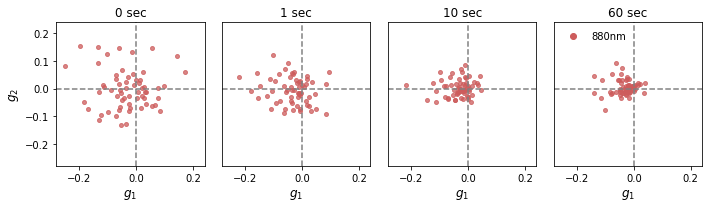

In [9]:
plt.figure(figsize=(10,3))
j = 0
for i in [0, 6, 10, 14]:
    j += 1
    plt.subplot(1, 4, j)
    plt.title(str(times[j-1]) + ' sec')
    for fileNumber in allFits.index:
        c = 'w' if allFits['critA'].loc[fileNumber] >= 128 or allFits['critB'].loc[fileNumber] >= 128 else 'indianred'
        if c == 'indianred':
            plt.plot(allFits['g1_b'].loc[fileNumber][i], allFits['g2_b'].loc[fileNumber][i], 'o', ms=4, alpha=0.75, color=c)
            
    if j in [1]:
        plt.ylabel('$g_2$', fontsize=fntsize)
    else:
        plt.yticks([])
    if j in [1, 2, 3, 4]:
        plt.xlabel('$g_1$', fontsize=fntsize)
    else:
        plt.xticks([])
    plt.ylim([-.28,.24])
    plt.xlim([-.28,.24])
    plt.axhline(0, linestyle='--', color='gray')
    plt.axvline(0, linestyle='--', color='gray')
    
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=rcol, lw=0, marker='o', label='880nm')]
plt.legend(frameon=False,handles=legend_elements)

plt.tight_layout()

# plt.savefig('../Plots/g1_g2_filterb_wb.png', dpi=300)
plt.show()

## Mode and quantile plots

In [10]:
N = len(allFits.index)
N_accepted = int(N)
accepted = np.zeros(N)
for i in range(N):
    fileNumber = allFits.index[i]
    accepted[i] = 0 if allFits['critA'].loc[fileNumber] >= 128 \
                or allFits['critB'].loc[fileNumber] >= 128 else 1  
    N_accepted += (accepted[i] - 1)

In [89]:
def addExpTimeAxis(fig, subplotN, fntsize, label=True, tickLabels=True):
    logAx = fig.add_subplot(subplotN, label="2", frame_on=False)
    logAx.set_yticks([])
    if label: 
        logAx.set_xlabel('exposure time [sec]', fontsize=fntsize)
    logAx.set_xscale('log')
    logAx.set_xlim((0.055,.068*1000))
    logAx.set_xticks([.06, 1, 10, 60])
    if tickLabels: 
        logAx.set_xticklabels([.06, 1, 10, 60])
    else:
        logAx.set_xticklabels([])
    return logAx

def makeBoxPlot(fig, subplotN, data, mainColor, medianColor, xLabel=True, hline=True, fliers=False, showmeans=False):
    ax = fig.add_subplot(subplotN)
    if hline:
        plt.axhline(0, color='gray', linewidth=1, alpha=.75)

    bp = ax.boxplot(data, whis=[15.9,84.1], showmeans=showmeans, meanline=showmeans,
                    flierprops={'markeredgecolor':mainColor}, meanprops={'color':medianColor, 'linewidth':4}, sym='',
                    widths=.15, patch_artist=True)
    ax.set_xticks([])
    ax.set_xticklabels([])
    logAx = addExpTimeAxis(fig, subplotN, fntsize, label=xLabel, tickLabels=xLabel)

    for element in ['boxes', 'whiskers', 'medians', 'caps']:
        plt.setp(bp[element], color=mainColor, linewidth=2, alpha=.8)
    plt.setp(bp['medians'], color=medianColor, linewidth=4)
    if fliers: plt.setp(bp['fliers'], alpha=.75, ms=3)
    if showmeans: 
        plt.setp(bp['means'], color=medianColor, linewidth=4)
        plt.setp(bp['medians'], color=medianColor, linewidth=2)
    return ax, logAx, bp

### g1

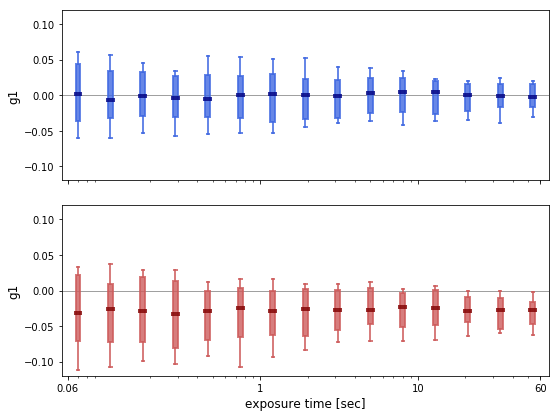

In [12]:
g1A = np.array([np.array(allFits['g1_a'].values[i]) for i in range(N) if accepted[i]])
g1B = np.array([np.array(allFits['g1_b'].values[i]) for i in range(N) if accepted[i]])

fig = plt.figure(1, figsize=(8, 6))

## filter a
ax, logAx, bp = makeBoxPlot(fig, 211, g1A, mainColor='royalblue', medianColor='navy', xLabel=False)
ax.set_ylabel('g1', fontsize=fntsize)
# ax.set_ylim([-.12,.07])
ax.set_ylim([-.12,.12])

## filter b
ax2, logAx2, bp2 = makeBoxPlot(fig, 212, g1B, mainColor='indianred', medianColor='maroon')
ax2.set_ylabel('g1', fontsize=fntsize)
# ax2.set_ylim([-.12,.07])
ax2.set_ylim([-.12,.12])

plt.tight_layout()

# plt.savefig('../Plots/g1_percentiles_wb.png', dpi=300)
plt.show()

### g2

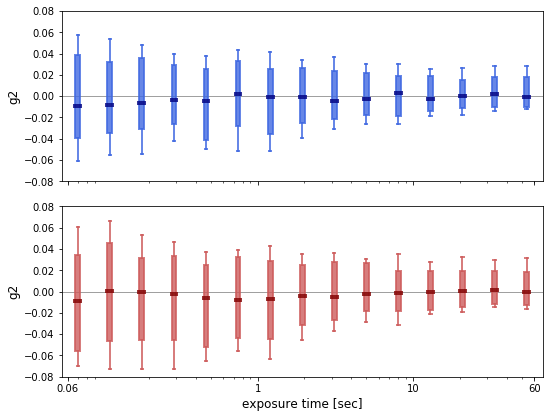

In [13]:
g2A = np.array([np.array(allFits['g2_a'].values[i]) for i in range(N) if accepted[i]])
g2B = np.array([np.array(allFits['g2_b'].values[i]) for i in range(N) if accepted[i]])

fig = plt.figure(1, figsize=(8, 6))

## filter a
ax, logAx, bp = makeBoxPlot(fig, 211, g2A, mainColor='royalblue', medianColor='navy', xLabel=False)
ax.set_ylabel('g2', fontsize=fntsize)
ax.set_ylim([-.08,.08])

## filter b
ax2, logAx2, bp2 = makeBoxPlot(fig, 212, g2B, mainColor='indianred', medianColor='maroon')
ax2.set_ylabel('g2', fontsize=fntsize)
ax2.set_ylim([-.08,.08])

plt.tight_layout()
# plt.savefig('../Plots/g2_percentiles_wb.png', dpi=300)
plt.show()

### Ellipticity magnitude

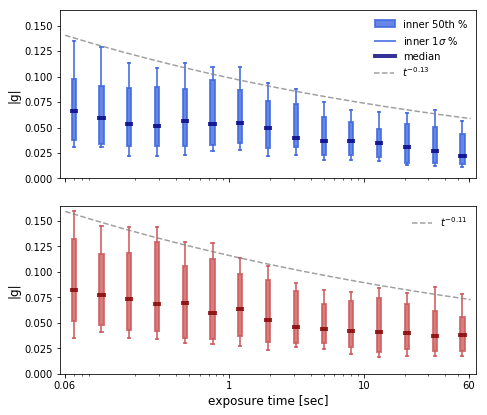

In [26]:
g1A = np.array([np.array(allFits['g1_a'].values[i]) for i in range(N) if accepted[i]])
g1B = np.array([np.array(allFits['g1_b'].values[i]) for i in range(N) if accepted[i]])
g2A = np.array([np.array(allFits['g2_a'].values[i]) for i in range(N) if accepted[i]])
g2B = np.array([np.array(allFits['g2_b'].values[i]) for i in range(N) if accepted[i]])

gA = np.sqrt(g1A**2 + g2A**2)
gB = np.sqrt(g1B**2 + g2B**2)

fig = plt.figure(1, figsize=(7, 6))

from scipy.optimize import curve_fit
pts = np.logspace(-1.22,1.79,15)
def power_law(t, alpha, b):
#     return alpha*np.log(t)+b
    return 

yA = np.percentile(gA, 84.1, axis=0)
pA, cA = curve_fit(power_law, xdata=pts, ydata= np.log(yA))

## filter a
ax, logAx, bp = makeBoxPlot(fig, 211, gA, mainColor='royalblue', medianColor='navy', xLabel=False)
logAx.plot(pts, np.exp(power_law(pts, pA[0], pA[1])), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pA[0]))
logAx.legend(frameon=False, bbox_to_anchor = [0.91, 0.73])
ax.legend([bp["boxes"][0],bp["whiskers"][0],bp["medians"][0]], 
          ['inner 50th %', 'inner 1$\sigma$ %', 'median'],
          frameon=False)
# ax.text(x=0.82, y=.5, s='$t^{{{:.2f}}}$'.format(p[0]), color='darkgrey', alpha=2,transform=ax.transAxes)
ax.set_ylabel('|g|', fontsize=fntsize)
ax.set_ylim([0,.165])
logAx.set_ylim([0,.165])
# ax.axhline(np.median(gA[:,-2]))

## filter b
yB = np.percentile(gB, 84.1, axis=0)
pB, cB = curve_fit(power_law, xdata=pts, ydata= np.log(yB))
ax2, logAx2, bp2 = makeBoxPlot(fig, 212, gB, mainColor='indianred', medianColor='maroon')
logAx2.plot(pts, np.exp(power_law(pts, pB[0], pB[1])), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pB[0]))
logAx2.legend(frameon=False)
ax2.set_ylabel('|g|', fontsize=fntsize)
ax2.set_ylim([0,.165])
logAx2.set_ylim([0,.165])
# ax2.axhline(np.median(gB[:,-2]))
plt.tight_layout()
# plt.savefig('../Plots/gmag_percentiles_fit_wb.png', dpi=300)

plt.show()

In [15]:
np.sqrt(c[0,0]), np.sqrt(cB[0,0])

(0.008105923219720703, 0.009397159474393041)

In [16]:
abs(p[0])-np.sqrt(c[0,0]), abs(pB[0])+np.sqrt(cB[0,0])

(0.11773849162112823, 0.12245573796339494)

### offset

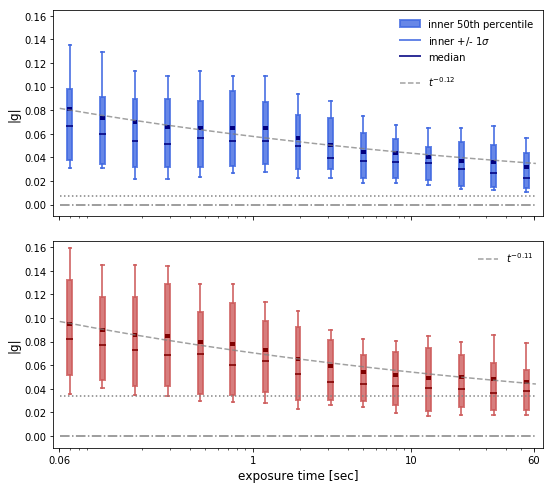

In [102]:
g1A = np.array([np.array(allFits['g1_a'].values[i]) for i in range(N) if accepted[i]])
g1B = np.array([np.array(allFits['g1_b'].values[i]) for i in range(N) if accepted[i]])
g2A = np.array([np.array(allFits['g2_a'].values[i]) for i in range(N) if accepted[i]])
g2B = np.array([np.array(allFits['g2_b'].values[i]) for i in range(N) if accepted[i]])

gA = np.sqrt(g1A**2 + g2A**2)
gB = np.sqrt(g1B**2 + g2B**2)

fig = plt.figure(1, figsize=(8, 7))

from scipy.optimize import curve_fit
pts = np.logspace(-1.22,1.79,15)
def power_law(t, alpha, a, e0):
    return a * t**alpha + e0

def power_law_fixed_a(t, alpha, a):
    return a * t**alpha + np.sqrt(g1A[:,-1].mean()**2 + g2A[:,-1].mean()**2)
def power_law_fixed_b(t, alpha, a):
    return a * t**alpha + np.sqrt(g1B[:,-1].mean()**2 + g2B[:,-1].mean()**2)

## filter a
# yA = np.percentile(gA, 50., axis=0)
yA = np.mean(gA, axis=0)
pA, cA = curve_fit(power_law, xdata=pts, ydata=yA, p0=[-.2, 0.5, 0], bounds=[[-1,-np.inf, 0], [0, np.inf, np.inf]])
# pA, cA = curve_fit(power_law_fixed_a, xdata=pts, ydata=yA, p0=[-.2, 0.5], bounds=[[-1,-np.inf], [0, np.inf]])

ax, logAx, bp = makeBoxPlot(fig, 211, gA, mainColor='royalblue', medianColor='navy', xLabel=False, hline=False, showmeans=True)
logAx.plot(pts, power_law(pts, pA[0], pA[1], pA[2]), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pA[0]))
# logAx.plot(pts, power_law_fixed_a(pts, pA[0], pA[1]), '--', color='gray', alpha=0.75, 
#            label='$t^{{{:.2f}}}$'.format(pA[0]))
logAx.legend(frameon=False, bbox_to_anchor = [0.84, 0.73])
ax.legend([bp["boxes"][0],bp["whiskers"][0],bp["medians"][0]], 
          ['inner 50th percentile', 'inner +/- 1$\sigma$', 'median'],
          frameon=False)
logAx.plot(pts, np.sqrt(g1A[:,-1].mean()**2 + g2A[:,-1].mean()**2)*np.ones(15), color='gray', ls=':')
logAx.plot(pts, pA[2]*np.ones(15), color='gray', ls='-.')
ax.set_ylabel('|g|', fontsize=fntsize)
ax.set_ylim([-0.01,.165])
logAx.set_ylim([-0.01,.165])
# ax.axhline(np.median(gA[:,-2]))

## filter b
# yB = np.percentile(gB, 50., axis=0)
yB = np.mean(gB, axis=0)
pB, cB = curve_fit(power_law, xdata=pts, ydata=yB, p0=[-.2, 0.5, 0], bounds=[[-1,-np.inf, 0], [0, np.inf, np.inf]])
# pB, cB = curve_fit(power_law_fixed_b, xdata=pts, ydata=yB, p0=[-.2, 0.5], bounds=[[-1,-np.inf], [0, np.inf]])

ax2, logAx2, bp2 = makeBoxPlot(fig, 212, gB, mainColor='indianred', medianColor='maroon', hline=False, showmeans=True)
logAx2.plot(pts, power_law(pts, pB[0], pB[1], pB[2]), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pB[0]))
# logAx2.plot(pts, power_law_fixed_b(pts, pB[0], pB[1]), '--', color='gray', alpha=0.75, 
#            label='$t^{{{:.2f}}}$'.format(pB[0]))
logAx2.legend(frameon=False)
logAx2.plot(pts, np.sqrt(g1B[:,-1].mean()**2 + g2B[:,-1].mean()**2)*np.ones(15), color='gray', ls=':')
logAx2.plot(pts, pB[2]*np.ones(15), color='gray', ls='-.')
ax2.set_ylabel('|g|', fontsize=fntsize)
ax2.set_ylim([-.01,.165])
logAx2.set_ylim([-.01,.165])
# ax2.axhline(np.median(gB[:,-2]))
plt.tight_layout()
# plt.savefig('../Plots/gmag_percentiles_fit_wb.png', dpi=300)

plt.show()

In [65]:
pA[2], pB[2]

(1.296232409911677e-10, 1.7763581077823258e-09)

In [49]:
np.sqrt(g1A[:,-1].mean()**2 + g2A[:,-1].mean()**2), np.sqrt(g1B[:,-1].mean()**2 + g2B[:,-1].mean()**2)

(0.007349481669623657, 0.03403128452408019)

In [63]:
yB[0]/yB[-1]

2.1632676700940396

### HLR ratio

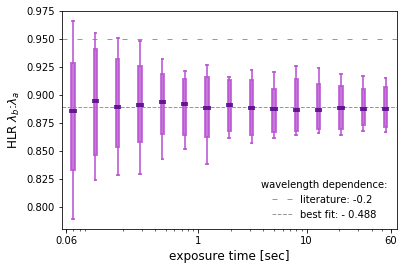

In [28]:
hlrA = np.array([np.array(allFits['hlr_a'].values[i]) for i in range(N) if accepted[i]])
hlrB = np.array([np.array(allFits['hlr_b'].values[i]) for i in range(N) if accepted[i]])

medianRatio = np.median(hlrB/hlrA, axis=0)
from scipy.optimize import curve_fit
def straightLine(x, b):
    return x + b
p, c = curve_fit(straightLine, xdata=np.zeros(15), ydata=medianRatio)
alpha = np.log(p[0])/np.log((692/880))

fig = plt.figure(1, figsize=(6, 4))

ax, lax, _ = makeBoxPlot(fig, 111, hlrB/hlrA, mainColor='mediumorchid', medianColor='indigo', hline=False)
ax.set_ylabel('HLR $\lambda_b$:$\lambda_a$', fontsize=fntsize)
ax.axhline(.95, linestyle=(0,(5,10)), color='gray', linewidth=1, alpha=.8, label='literature: -0.2')
ax.axhline(p[0], linestyle='--', color='gray', linewidth=1, alpha=.8, label=f'best fit: -{alpha: .3f}')

ax.legend(title='wavelength dependence:', frameon=False)
# plt.savefig('../Plots/hlr_percentiles_wb.png', dpi=300)

plt.show()